In [1]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [5]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

In [7]:
print(boston.data)

[[   0.01   18.      2.31    0.   ...,  296.     15.3   396.9     4.98]
 [   0.03    0.      7.07    0.   ...,  242.     17.8   396.9     9.14]
 [   0.03    0.      7.07    0.   ...,  242.     17.8   392.83    4.03]
 [   0.03    0.      2.18    0.   ...,  222.     18.7   394.63    2.94]
 ..., 
 [   0.05    0.     11.93    0.   ...,  273.     21.    396.9     9.08]
 [   0.06    0.     11.93    0.   ...,  273.     21.    396.9     5.64]
 [   0.11    0.     11.93    0.   ...,  273.     21.    393.45    6.48]
 [   0.05    0.     11.93    0.   ...,  273.     21.    396.9     7.88]]


In [8]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

In [9]:
# First 10 elements of the data
print(x[:10])

[[   0.01   18.      2.31    0.      0.54    6.58   65.2     4.09    1.    296.     15.3   396.9     4.98    1.  ]
 [   0.03    0.      7.07    0.      0.47    6.42   78.9     4.97    2.    242.     17.8   396.9     9.14    1.  ]
 [   0.03    0.      7.07    0.      0.47    7.18   61.1     4.97    2.    242.     17.8   392.83    4.03    1.  ]
 [   0.03    0.      2.18    0.      0.46    7.     45.8     6.06    3.    222.     18.7   394.63    2.94    1.  ]
 [   0.07    0.      2.18    0.      0.46    7.15   54.2     6.06    3.    222.     18.7   396.9     5.33    1.  ]
 [   0.03    0.      2.18    0.      0.46    6.43   58.7     6.06    3.    222.     18.7   394.12    5.21    1.  ]
 [   0.09   12.5     7.87    0.      0.52    6.01   66.6     5.56    5.    311.     15.2   395.6    12.43    1.  ]
 [   0.14   12.5     7.87    0.      0.52    6.17   96.1     5.95    5.    311.     15.2   396.9    19.15    1.  ]
 [   0.21   12.5     7.87    0.      0.52    5.63  100.      6.08    5.    311. 

In [10]:
# First 10 elements of the response variable
print(y[:10])

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


In [11]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Let's see predictions for the first 10 instances
print(linreg.predict(x[:10]))

[ 30.01  25.03  30.57  28.61  27.94  25.26  23.    19.53  11.52  18.92]


In [13]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err[:10])

[ 6.01  3.43  4.13  4.79  8.26  3.44  0.1   7.57  4.98  0.02]


In [14]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

4.67950630064


In [15]:
# We can view the regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -0.11   0.05   0.02   2.69 -17.8    3.8    0.    -1.48   0.31  -0.01  -0.95   0.01  -0.53   0.  ]


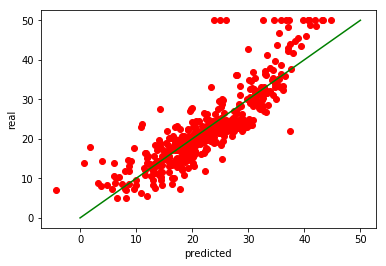

In [16]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [19]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [20]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6795
RMSE on 10-fold CV: 5.8819


In [21]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],y[train])
    p = ridge.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

In [ ]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

In [ ]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [ ]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(x))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print("\n")

In [ ]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

In [ ]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [ ]:
w = standRegres(x,y)
print(w)

In [ ]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [ ]:
w_ridge = ridgeRegres(x,y,0.5)
print(w_ridge)

In [ ]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w_ridge

In [ ]:
print(yHat[0:10])

In [ ]:
print(yMat.T[0:10])